# PART 2


# Analysis of data from data frames after usage of the pyphe-growthcurves pipeline; Data visualization (Heatmaps)


The notebook is the second part of the script for analysis of the data obtained from Bioscreen or any other multi-well plate experiment. On the previous notebook, we prepared the data frames with results of the maximum slope and lag phase, according to the script described by Stephan Kamrad frim Bahler's Lab.

The data frames should be available in folders:

                ./Data/Bioscreen_data_YES/
                ./Data/Bioscreen_data_EMM

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

%matplotlib inline

#### Let's create new directories

In [2]:
!mkdir DataFrames # Directory for saving new data frames
!mkdir Heatmaps # Directory for saving the plots/heatmaps

# Analysis of data for the mutants cultivated in YES medium

### Import data

In [3]:
# YES:
path_YES =r'./Example_data/Bioscreen_data_YES/'
filenames_YES = glob.glob(path_YES + "*.csv")

In [4]:
import os.path
old_names=[os.path.splitext(os.path.basename(name))[0] for name in filenames_YES]

In [5]:
YES_list=[pd.read_csv(filename_YES) for filename_YES in filenames_YES]

### Preprocessing of results

Before starting the preparation of heatmaps, we need to preprocessed data in the data frames, and t normalize results.

Preprocessing of data have several steps:
* Add a new column "Medium" containing the proper medium name (YES or EMM, respectively);
* Split the column "Mutants" to obtain separately in the next steps the columns with the name of strain/mutant and name of stressor;
* Add a new column "Medium_Stress" by merging the columns "Medium" and "Stress" - we will use this column as y-label.

In [6]:
# Preprocessing of data frames

def put_yeast_stress(YES):
    '''
    This function:
    adds a new column "Medium" containing the proper medium name (YES or EMM, respectively);
    splits the column "Mutants" to the columns containing the name of strain/mutant and name of stressor;
    adds a new column "Medium_Stress" by merging the columns "Medium" and "Stress"
    
    '''
    YES['Medium'] = 'YES' 
    new_i = YES["Mutants"].str.split("_", n = 1, expand = True)   
    YES["Yeast"]= new_i[0]   
    YES["Stress"]= new_i[1]  
    YES['Medium_Stress'] = YES[['Medium','Stress']].apply(lambda x: '_'.join(x[x.notnull()]),
                                                      axis = 1)  
   

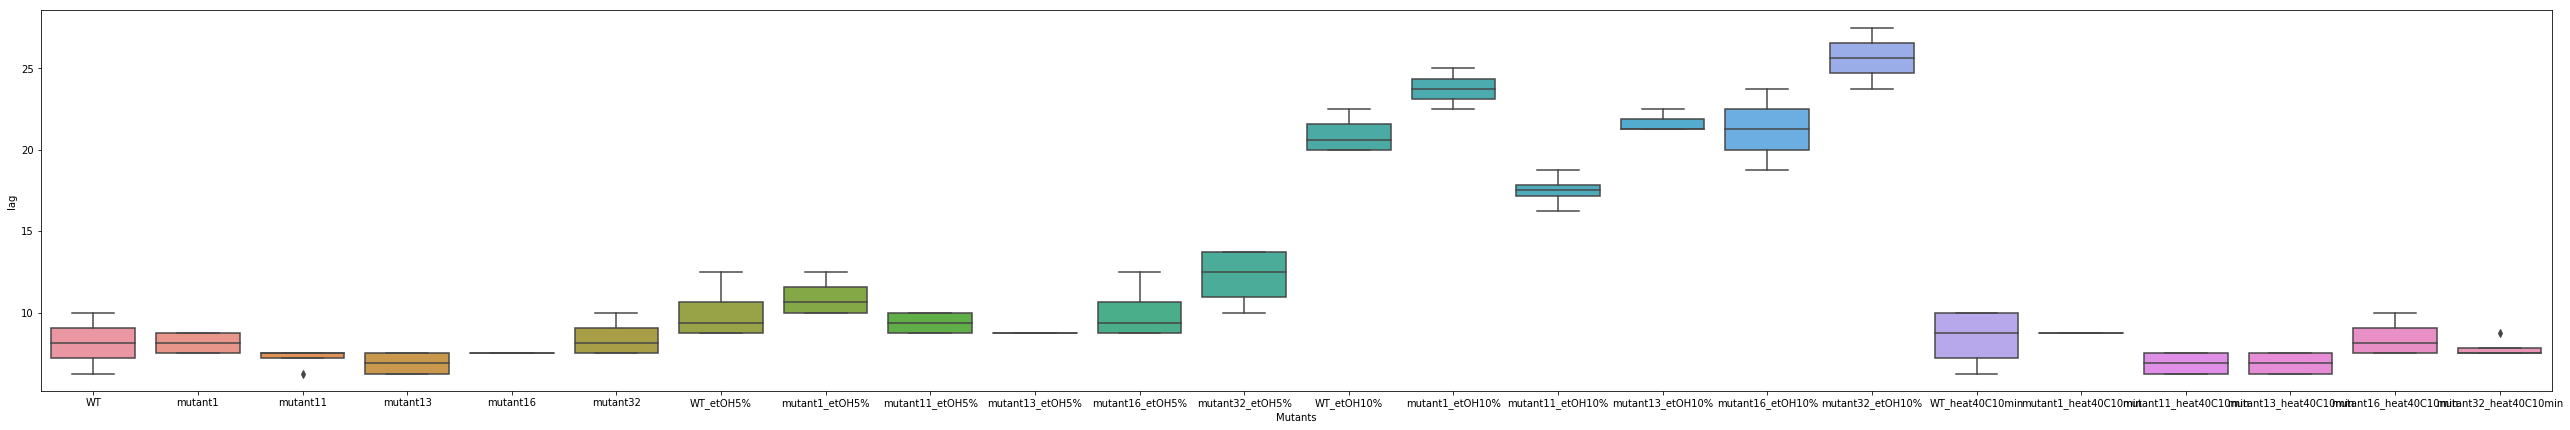

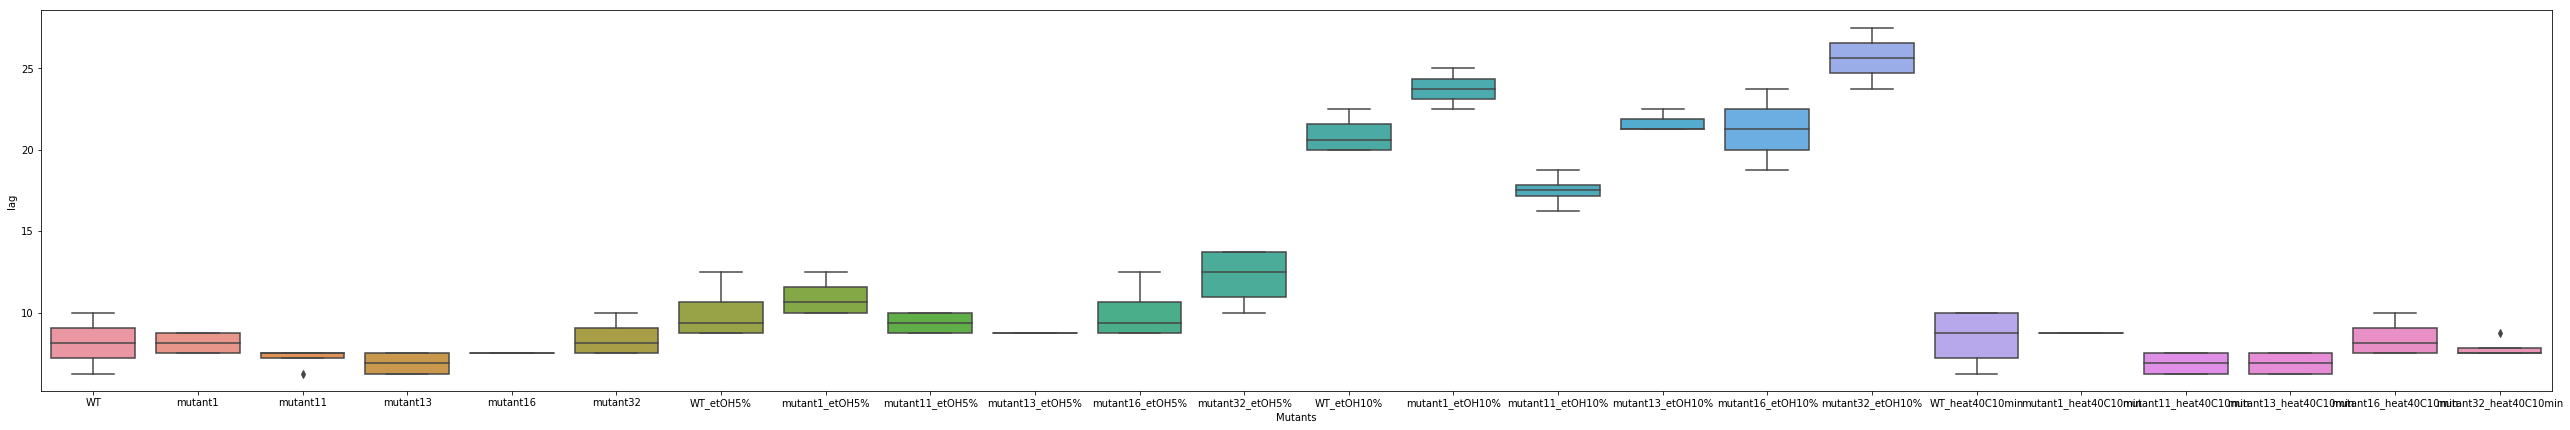

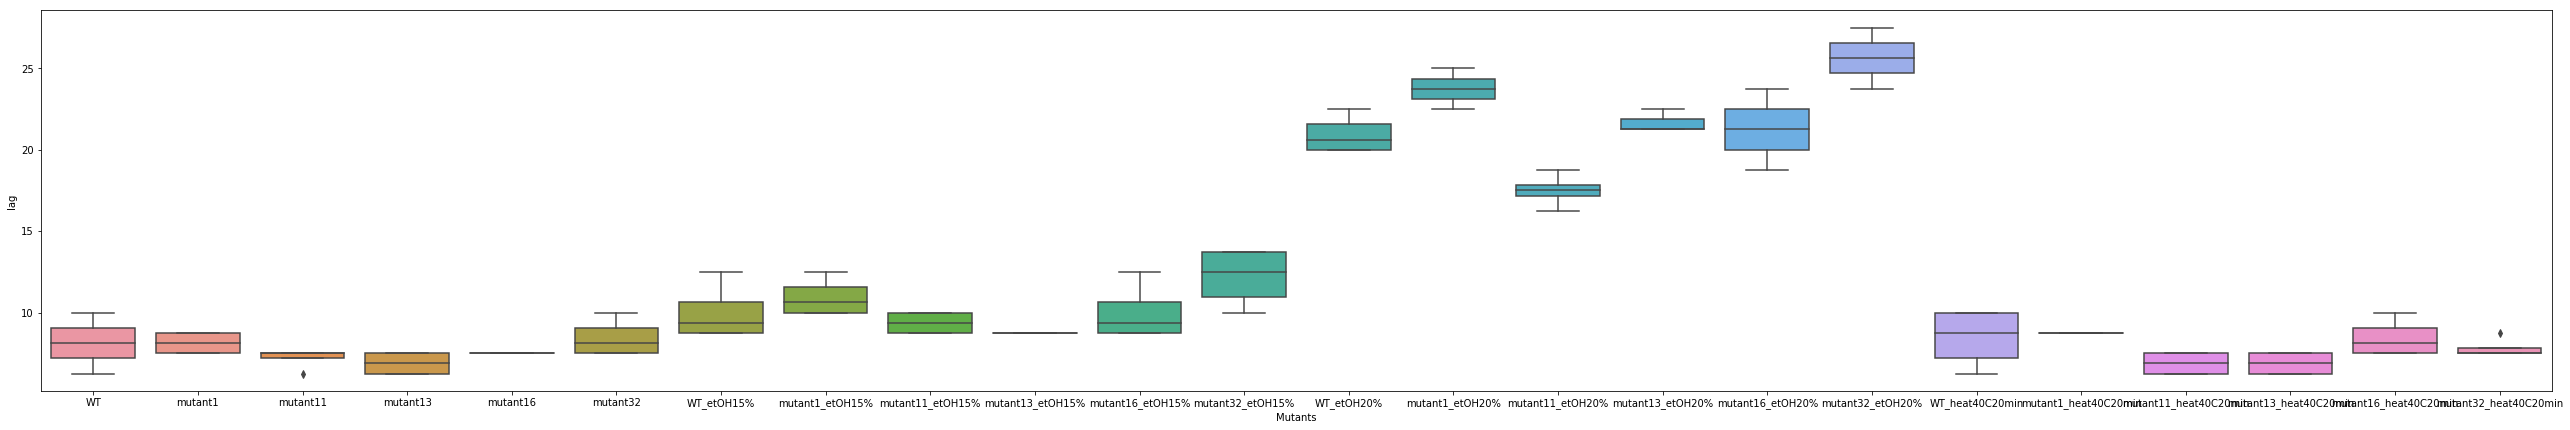

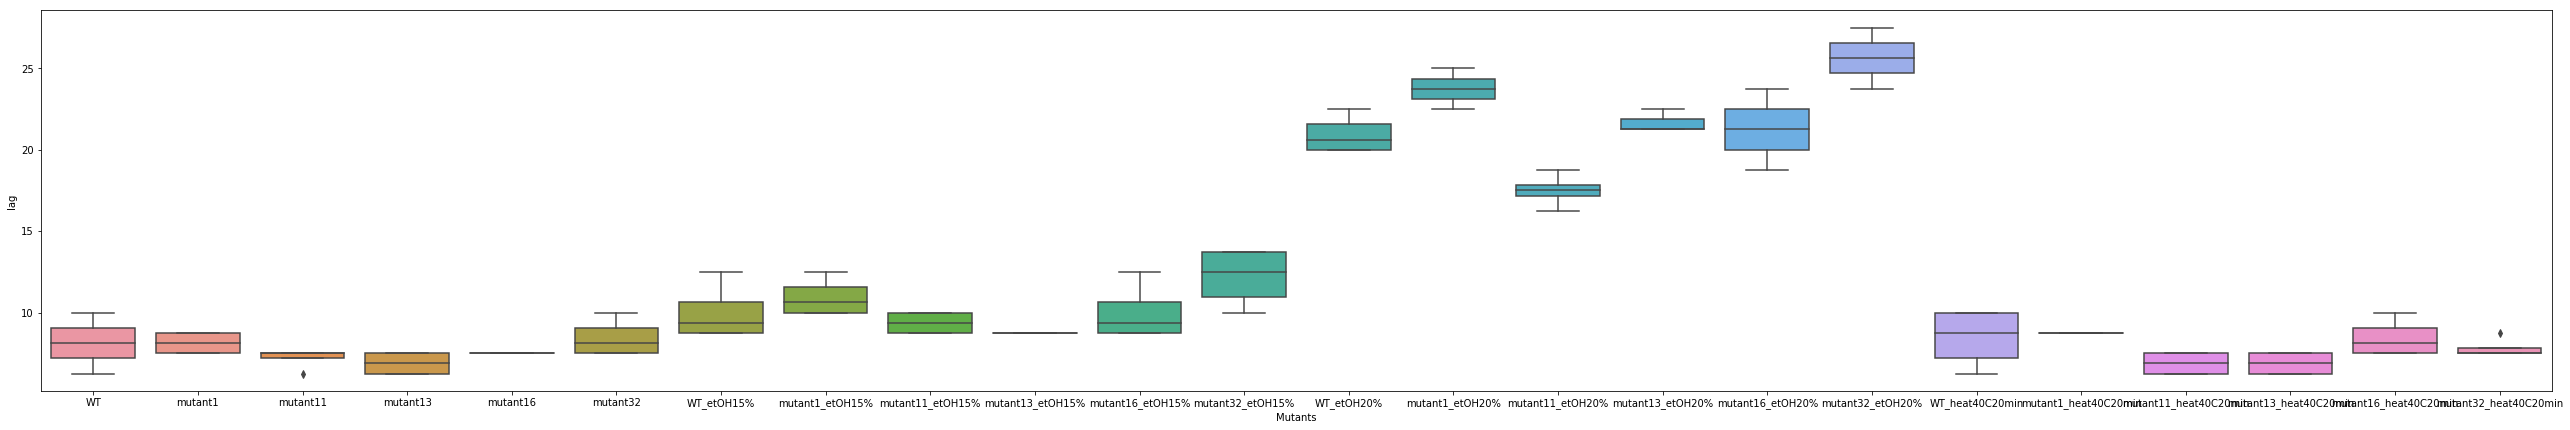

In [16]:
# Execute the function for all the data frames:

for YES in YES_list:
    for number in range(len(YES_list)):
        put_yeast_stress(YES)
        f = plt.figure(figsize=(45,7))
        sns.boxplot(x = YES["Mutants"],y=YES["lag"])
        f.savefig("plots/pyphe_lag_stres_{}.png".format(number))

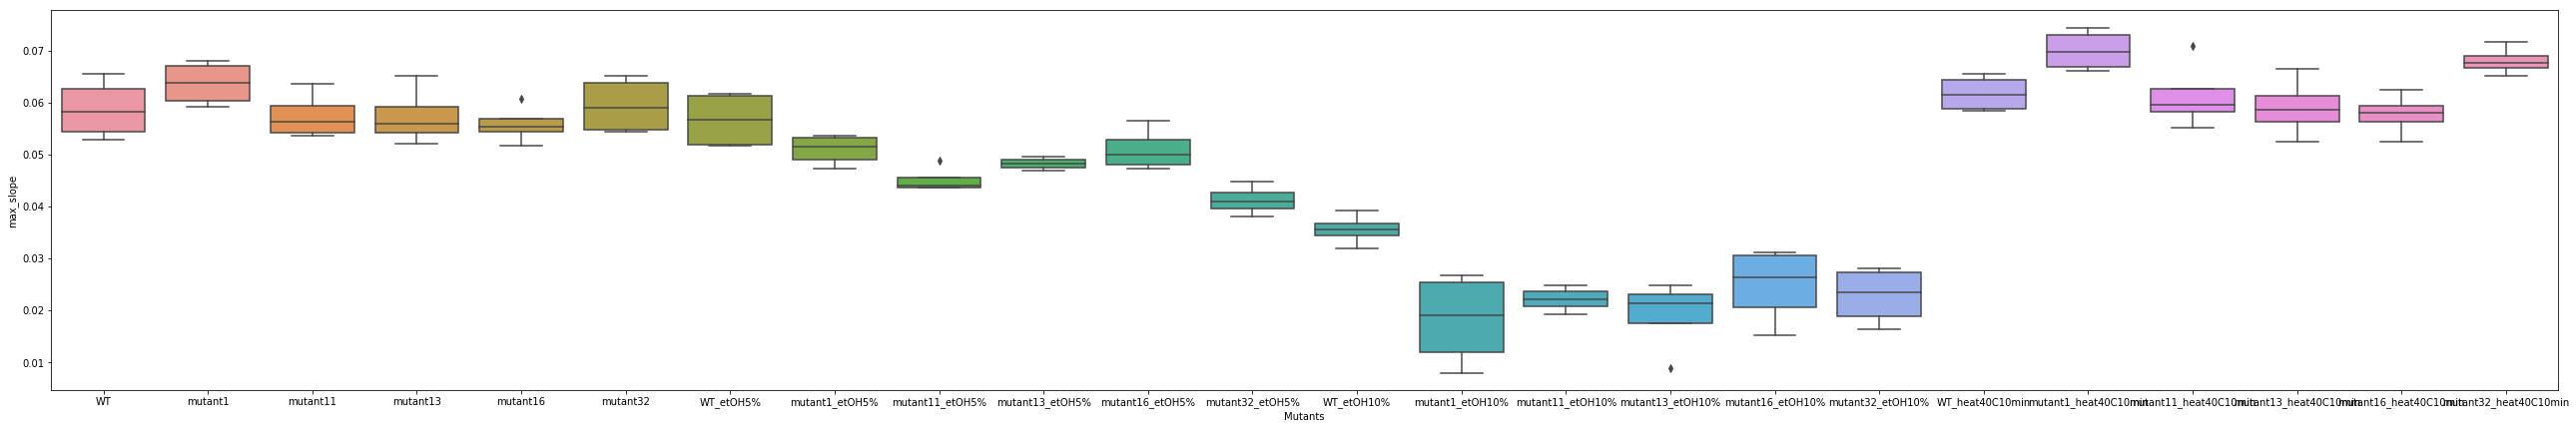

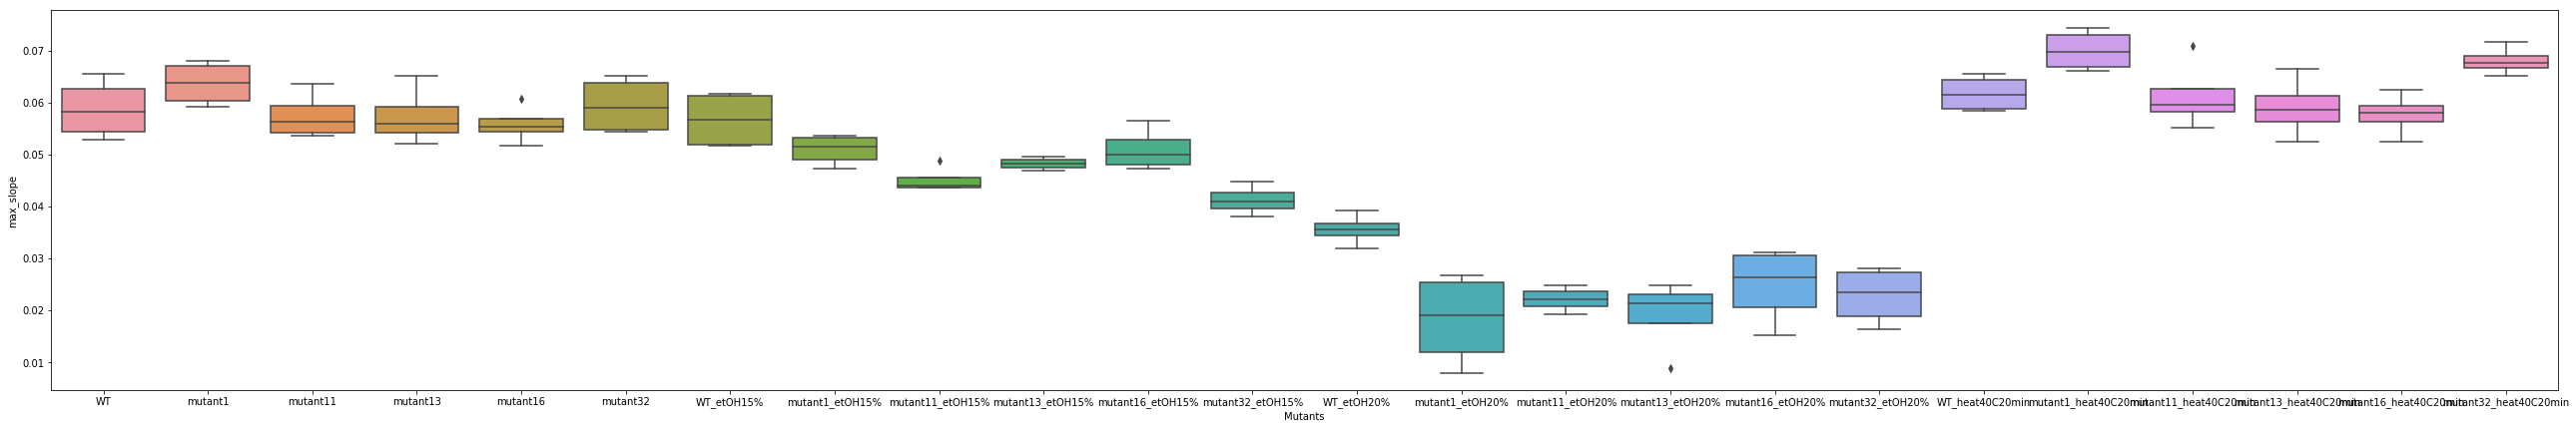

In [12]:
# Execute the function for all the data frames:

for YES in YES_list:
    for number in range(1, len(YES_list)):
        put_yeast_stress(YES)
        f = plt.figure(figsize=(45,7))
        sns.boxplot(x = YES["Mutants"],y=YES["max_slope"])
        f.savefig("plots/pyphe_lag_stres_{}.png".format(number))

In [ ]:
# lagfaza
f = plt.figure(figsize=(45,7))
sns.boxplot(x = wyniki_pyphe_transposed["Mutant"],y=wyniki_pyphe_transposed["lag"])
#f.savefig("pyphe_lag_stres_20190517.png")

In [39]:
""" 
zip() is a python build-in function takes a pair one from first one from second list.
It just works like a zipper. 
It takes two lists, and aggregates the arguments having the same possition (e.g. 0,1,2,..)

"""

for old_name,YES in zip(old_names,YES_list): 
    '''
    This function save all the data frames obtained in previous step as csv files in the folder "DataFrames". 

    '''
    print(os.path.join("DataFrames","preprocessed_%s.csv" % old_name))
    YES.to_csv(os.path.join("DataFrames","preprocessed_%s.csv" % old_name))

DataFrames/preprocessed_YES_20190601.csv
DataFrames/preprocessed_YES_20190602.csv


### Make the pivot tables containing maximum slope and lag phase, respectively

In [40]:
lagphase_pivot_YES_list=[YES.pivot_table(index='Yeast', columns='Medium_Stress', values='lag')
                        for YES in YES_list]

maxslope_pivot_YES_list=[YES.pivot_table(index='Yeast', columns='Medium_Stress', values='max_slope')
                        for YES in YES_list]

In [41]:
for old_name,YES in zip(old_names, lagphase_pivot_YES_list):
    '''
    This function save the pivot tables with lag phase (results before normalization) 
    as csv files in the folder "DataFrames"
    '''
    print(os.path.join("DataFrames","lagphase_pivot_%s.csv" % old_name))
    YES.to_csv(os.path.join("DataFrames","lagphase_pivot_%s.csv" % old_name))

DataFrames/lagphase_pivot_YES_20190601.csv
DataFrames/lagphase_pivot_YES_20190602.csv


In [ ]:
for old_name,YES in zip(old_names, maxslope_pivot_YES_list):
    '''
    This function save the pivot tables with maximum slope (results before normalization) 
    as csv files in the folder "DataFrames"
    '''
    print(os.path.join("DataFrames","maxslope_pivot_%s.csv" % old_name))
    YES.to_csv(os.path.join("DataFrames","maxslope_pivot_%s.csv" % old_name))

In [ ]:
# Print the pivot tables (if you want):
print("results of lag phase:")
print(lagphase_pivot_YES_list)
print("")
print("")
print("results of Maximum slope:")
print(maxslope_pivot_YES_list)

### Normalization of pivot tables with lag phase and maximum slope

Every data frame was prepared as a result of separate experiment. Due to that and the possibility of some differences between the experiments, we will normalize the results for every experiment (data frame) separately. After that, we will merge the normalized pivot tables.

Data for each mutant were normalized to growth on media without the stressor (EMM or YES respectively). 


## Uwaga: poniższe funkcje są do drobnej modyfikacji. 

In [ ]:
# Lag phase
for i in lagphase_pivot_YES_list:
    for number in range(1,2):
        lagphase_divider_YES[number]= i['YES']
        lagphase_divider_YES[number] = lagphase_divider_YES[number].transpose()
        
        lagphase_after_transpose = i[number]
 #       lagphase_after_transpose[number] = i[number].transpose() 
    
    
 #       lagphase_after_transpose_YES[number] = i[number].transpose()
        pivot_lagphase_normalized_YES[number] = lagphase_after_transpose_YES[number]/lagphase_divider_YES[number]
        pivot_lagphase_normalized_YES[number] = pivot_lagphase_normalized_YES[number].transpose()

In [ ]:
# Maximum slope
for i in maxslope_pivot_YES_list:
    for number in range(1,2):
        maxslope_divider_YES[number]= i['YES']
        maxslope_divider_YES[number] = maxslope_divider_YES[number].transpose()
        
        maxslope_after_transpose = i[number]
 #       lagphase_after_transpose[number] = i[number].transpose() 
    
    
 #       lagphase_after_transpose_YES[number] = i[number].transpose()
        pivot_maxslope_normalized_YES[number] = maxslope_after_transpose_YES[number]/maxslope_divider_YES[number]
        pivot_maxslope_normalized_YES[number] = pivot_maxslope_normalized_YES[number].transpose()

In [ ]:
for old_name,YES in zip(old_names, YES_pivot_lagphase_normalized):
    '''
    This function save the pivot tables with normalized lag phase
    as csv files in the folder "DataFrames"
    '''
    print(os.path.join("DataFrames","lagphase_pivot_normalized_%s.csv" % old_name))
    YES.to_csv(os.path.join("DataFrames","lagphase_normalized_pivot_%s.csv" % old_name))

In [ ]:
for old_name,YES in zip(old_names, YES_pivot_maxslope_normalized):
    '''
    This function save the pivot tables with normalized maximum slope
    as csv files in the folder "DataFrames"
    '''
    print(os.path.join("DataFrames","maxslope_pivot_normalized_%s.csv" % old_name))
    YES.to_csv(os.path.join("DataFrames","maxslope_normalized_pivot_%s.csv" % old_name))

In [ ]:
# Print the pivot tables with normalized results (if you want):
print("Normalized results of lag phase:")
print(YES_pivot_lagphase_normalized)
print("")
print("")
print("Normalized results of Maximum slope:")
print(YES_pivot_maxslope_normalized)

## YES - Heatmaps preparation

In [ ]:
# Helper funtion with interactive widgets to select proper size of labels and title

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact
def heat_map_fun(label_size=15,title_size=15):
    def heat_map_elegant(title,path_to_save,df,cmap='RdYlBu',ylabel='Fission yeast name'):
        
        '''
        This function will create the heatmap using Ipython widgets. 
        This interactive tool will allow to  to select proper size of labels and title
        '''
        ax =sns.heatmap(df,cmap=cmap,linewidths=5)
        #with sns.axes_style("white"):
        #    ax = sns.heatmap(df, vmax=.3, square=True)
        fig=ax.figure #wyciagamy dostep do figure
        fig.set_size_inches(10,8)
        ax.set(title=title,
               ylabel=ylabel,
              xlabel='Growth medium/ stress conditions',
              )
        ax.xaxis.label.set_size(label_size)
        ax.yaxis.label.set_size(label_size)
        ax.title.set_size(title_size)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
                 rotation_mode="anchor")

        plt.setp(ax.get_yticklabels(), style="italic")    
        #fig.savefig(path_to_save+".pdf",dpi=150)
        #fig.savefig(path_to_save+".png",dpi=150)
        return ax,fig
    return heat_map_elegant("The normalized maximum slope of fission yeast in YES",
                            "Heatmaps//YES_max_slope_RdYlBu_znormalizowana",YES_pivot_maxslope_normalized)

## Colors of the heatmap

We used two kinds of colors of cmap:
1. 'RdYlBu' for visualizing the lag phase
2. 'RdYlBu_r' ('RdYlBu' with reversed colors) for visualizing the maximum slope

We used this approach because the higher result of the lag phase means the longest time before the exponential growth phase. The maximum slope has the opposite tendency - the highest result of maximum, the fastest growth in the exponential phase. 

You can find other colors for the label here: https://matplotlib.org/examples/color/colormaps_reference.html


In [ ]:
reversed('RdYlBu')

'''
This function reverses the colors of chosen cmap 'RdYlBu' and makes new cmap named 'RdYlBu_r

Input: 'RdYlBu'
Output: 'RdYlBu_r'

'''

## Make the heatmaps

In [ ]:
def heat_map_elegant_YES(title,path_to_save,df,cmap,ylabel='Name of ncPAP deletion mutants'):
    '''
    This function will create a heatmap and save it as pdf and png.
    
    title: title of plot [string]
    path_to_save: path to directory where the heatmap will be saved [string]
    df: 
    
    '''
    ax =sns.heatmap(df,cmap=cmap,linewidths=1)
    #with sns.axes_style("white"):
    #    ax = sns.heatmap(df, vmax=.3, square=True)
    fig=ax.figure #wyciagamy dostep do figure
    fig.set_size_inches(6,9)
    ax.set(title=title,
           ylabel=ylabel,
          xlabel='YES & stress conditions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", fontsize=20)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize=20)
    
    plt.setp(ax.get_yticklabels(), style="italic")   
    plt.rcParams.update({'legend.labelspacing':0.25})
    fig.tight_layout()

    fig.savefig(path_to_save+".pdf",dpi=150)
    fig.savefig(path_to_save+".png",dpi=150)
    return ax,fig

In [ ]:
# Heatmap of the normalized maximum slope of fission yeast in YES

heat_map_elegant_YES("The normalized maximum slope of fission yeast in YES",
                     "Plots_Heatmaps//YES_max_slope_RdYlBu_znormalizowana",
                     YES_pivot_maxslope_normalized,'RdYlBu_r')

In [ ]:
# Heatmap of the normalized lag phase of fission yeast in YES

heat_map_elegant_YES("The normalized lag phase of fission yeast in YES",
                     "Plots_Heatmaps//YES_lagphase_RdYlBu_znormalizowana",
                     YES_pivot_lagphase_normalized,'RdYlBu')

# Analysis of data for the mutants cultivated in EMM medium
### Preprocessing of results, and preparation of heatmaps (the same as for YES medium) 

In [2]:
# Make a path for data and list of files:
path_EMM =r'./Example_data/Bioscreen_data_EMM/'
filenames_EMM = glob.glob(path_EMM + "*.csv")
filenames_EMM_short = filenames_EMM


In [3]:
import os.path
old_names=[os.path.splitext(os.path.basename(name))[0] for name in filenames_EMM]

In [4]:
EMM_list=[pd.read_csv(filename_EMM) for filename_EMM in filenames_EMM ]

In [5]:
# We have 3 example files with results of maximum slope and lag phase of mutants cultivated 
# in EMM supplemented with stressors
#
# Please do it only once - the second one will change the output


def put_yeast_stress(EMM):
    EMM['Medium'] = 'EMM'        #Add new column 'Medium'    
    new_i = EMM["Mutants"].str.split("_", n = 1, expand = True)  # Make temporarily 'new' data frame    
    EMM["Yeast"]= new_i[0] # Add column 'Yeast' from 'new' data frame    
    EMM["Stress"]= new_i[1]  # Add column 'Stress' from 'new' data frame    
    EMM['Medium_Stress'] = EMM[['Medium','Stress']].apply(lambda x: '_'.join(x[x.notnull()]),
                                                      axis = 1) # Add column '_Medium_Stress'

In [6]:
for EMM in EMM_list:
    put_yeast_stress(EMM)

In [7]:
for old_name,EMM in zip(old_names,EMM_list): # takes a pair one from first one from second list
    print(os.path.join("DataFrames","preprocessed_%s.csv" % old_name))
    EMM.to_csv(os.path.join("DataFrames","preprocessed_%s.csv" % old_name))

DataFrames/preprocessed_EMM_20190624.csv
DataFrames/preprocessed_EMM_20190613.csv
DataFrames/preprocessed_EMM_20190612.csv


In [8]:
lagphase_pivot_EMM_list=[EMM.pivot_table(index='Yeast', columns='Medium_Stress', values='lag')
                        for EMM in EMM_list]

maxslope_pivot_EMM_list=[EMM.pivot_table(index='Yeast', columns='Medium_Stress', values='max_slope')
                        for EMM in EMM_list]

In [9]:
for old_name,EMM in zip(old_names, lagphase_pivot_EMM_list):
    print(os.path.join("DataFrames","lagphase_pivot_%s.csv" % old_name))
    EMM.to_csv(os.path.join("DataFrames","lagphase_pivot_%s.csv" % old_name))

DataFrames/lagphase_pivot_EMM_20190624.csv
DataFrames/lagphase_pivot_EMM_20190613.csv
DataFrames/lagphase_pivot_EMM_20190612.csv


In [10]:
for old_name,EMM in zip(old_names, maxslope_pivot_EMM_list):
    print(os.path.join("DataFrames","maxslope_pivot_%s.csv" % old_name))
    EMM.to_csv(os.path.join("DataFrames","maxslope_pivot_%s.csv" % old_name))

DataFrames/maxslope_pivot_EMM_20190624.csv
DataFrames/maxslope_pivot_EMM_20190613.csv
DataFrames/maxslope_pivot_EMM_20190612.csv


In [11]:
list_of_lagphase_EMM=[pd.read_csv(os.path.join("DataFrames","maxslope_pivot_%s.csv" % old_name))]

In [12]:
# Data for each mutant were normalized to growth on media without the stressor (EMM or YES, respectively).

# Lag phase
for i in list_of_lagphase_EMM:
    for number in range (1,5):
        lagphase_divider_EMM = i['EMM']
        lagphase_divider_EMM[number] = lagphase_divider_EMM[number].transpose()
    
        lagphase_after_transpose_EMM = i[0]
        lagphase_after_transpose_EMM[number] = i.transpose()
        pivot_lagphase_normalized_EMM[number] = lagphase_after_transpose_EMM[number]/lagphase_divider_EMM[number]
        pivot_lagphase_normalized_EMM[number] = pivot_lagphase_normalized_EMM[number].transpose()
   

/home/lidia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


KeyError: 0

In [ ]:
# Maximum slope
for i in list_of_maxslope_EMM:
    for number in range (1,5):
        maxslope_divider_EMM = i['EMM']
        maxslope_divider_EMM[number] = maxslope_divider_EMM[number].transpose()
    
        maxslope_after_transpose_EMM = i[0]
        maxslope_after_transpose_EMM[number] = i.transpose()
        pivot_maxslope_normalized_EMM[number] = maxslope_after_transpose_EMM[number]/maxslope_divider_EMM[number]
        pivot_maxslope_normalized_EMM[number] = pivot_maxslope_normalized_EMM[number].transpose()

### Join pivot tables (lag phase and maxslope separately) after all of EMM experiments together

In [ ]:
#LAG PHASE

frames_lagphase_EMM = [normalized_lagphase_EMM_pivot_30052019,
                       normalized_lagphase_EMM_pivot_06062019, normalized_lagphase_EMM_pivot_12062019, 
                       normalized_lagphase_EMM_pivot_13062019,normalized_lagphase_EMM_pivot_24062019]

joined_frames_lagphase_EMM = pd.concat(frames_lagphase_EMM)

In [ ]:
#LAG PHASE

frames_maxslope_EMM = [normalized_maxslope_EMM_pivot_30052019,
                       normalized_maxslope_EMM_pivot_06062019, normalized_maxslope_EMM_pivot_12062019, 
                       normalized_maxslope_EMM_pivot_13062019,normalized_maxslope_EMM_pivot_24062019]

joined_frames_maxslope_EMM = pd.concat(frames_maxslope_EMM )
joined_frames_maxslope_EMM


### Heatmaps

In [13]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact
def heat_map_fun(label_size=15,title_size=15):
    def heat_map_elegant(title,path_to_save,df,cmap='RdYlBu',ylabel='Fission yeast name'):
        ax =sns.heatmap(df,cmap=cmap,linewidths=5)
        #with sns.axes_style("white"):
        #    ax = sns.heatmap(df, vmax=.3, square=True)
        fig=ax.figure #wyciagamy dostep do figure
        fig.set_size_inches(10,8)
        ax.set(title=title,
               ylabel=ylabel,
              xlabel='Growth medium/ stress conditions',
              )
        ax.xaxis.label.set_size(label_size)
        ax.yaxis.label.set_size(label_size)
        ax.title.set_size(title_size)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
                 rotation_mode="anchor")

        plt.setp(ax.get_yticklabels(), style="italic")    
        #fig.savefig(path_to_save+".pdf",dpi=150)
        #fig.savefig(path_to_save+".png",dpi=150)
        return ax,fig
    return heat_map_elegant("EMM_max_slope_RdYlBu_znormalizowana","ploty/EMM_max_slope_RdYlBu_znormalizowana",results_EMM_all_lag)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xNSwgZGVzY3JpcHRpb249dSdsYWJlbF9zaXplJywgbWF4PTQ1LCBtaW49LTE1KSwgSW50U2xpZGVyKHZhbHVlPTE1LCBkZXPigKY=


In [14]:
def heat_map_elegant(title,path_to_save,df,cmap='RdYlBu_r',ylabel='Name of ncPAP deletion mutants'):
    ax =sns.heatmap(df,cmap=cmap,linewidths=1)
    #with sns.axes_style("white"):
    #    ax = sns.heatmap(df, vmax=.3, square=True)
    fig=ax.figure #wyciagamy dostep do figure
    fig.set_size_inches(5,5.9)
    ax.set(title=title,
           ylabel=ylabel,
          xlabel='EMM & stress conditions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", fontsize=20)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize=20)
    
    plt.setp(ax.get_yticklabels(), style="italic")   
    plt.rcParams.update({'legend.labelspacing':0.25})
    fig.tight_layout()

    fig.savefig(path_to_save+".pdf",dpi=150)
    fig.savefig(path_to_save+".png",dpi=150)
    return ax,fig

#ax,fig=heat_map_elegant("EMM_max_slope_RdYlBu_znormalizowana","ploty/EMM_max_slope_RdYlBu_znormalizowana",df);

In [15]:
ax,fig=heat_map_elegant("The normalized maximum slope of fission yeast in EMM medium",
                        "ploty/EMM_maxslope_LL",results_EMM_all_maxslope);

NameError: name 'results_EMM_all_maxslope' is not defined

In [ ]:
def heat_map_elegant_YES(title,path_to_save,df,cmap='RdYlBu_r',ylabel='Fission yeast name'):
    ax =sns.heatmap(df,cmap=cmap,linewidths=1)
    #with sns.axes_style("white"):
    #    ax = sns.heatmap(df, vmax=.3, square=True)
    fig=ax.figure #wyciagamy dostep do figure
    fig.set_size_inches(5.5,9)
    ax.set(title=title,
           ylabel=ylabel,
          xlabel='YES & stress conditions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", fontsize=20)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize=20)
    
    plt.setp(ax.get_yticklabels(), style="italic")   
    plt.rcParams.update({'legend.labelspacing':0.25})
    fig.tight_layout()

    fig.savefig(path_to_save+".pdf",dpi=150)
    fig.savefig(path_to_save+".png",dpi=150)
    return ax,fig

In [ ]:
ax,fig=heat_map_elegant("The normalized Lag phase of fission yeast in EMM medium",
                        "ploty/EMM_lagphase_LL",df_yes_maxslope);

In [ ]:
def heat_map_elegant_YES(title,path_to_save,df,cmap='RdYlBu_r',ylabel='Fission yeast name'):
    ax =sns.heatmap(df,cmap=cmap,linewidths=1)
    #with sns.axes_style("white"):
    #    ax = sns.heatmap(df, vmax=.3, square=True)
    fig=ax.figure #wyciagamy dostep do figure
    fig.set_size_inches(5.5,9)
    ax.set(title=title,
           ylabel=ylabel,
          xlabel='YES & stress conditions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", fontsize=20)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize=20)
    
    plt.setp(ax.get_yticklabels(), style="italic")   
    plt.rcParams.update({'legend.labelspacing':0.25})
    fig.tight_layout()

    fig.savefig(path_to_save+".pdf",dpi=150)
    fig.savefig(path_to_save+".png",dpi=150)
    return ax,fig

#ax,fig=heat_map_elegant("EMM_max_slope_RdYlBu_znormalizowana","ploty/EMM_max_slope_RdYlBu_znormalizowana",df)

In [ ]:
sns.heatmap(results_EMM_all_lag, cmap='RdYlBu')